# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


In [144]:
!pip install jupyter_contrib_nbextensions



SyntaxError: invalid syntax (<ipython-input-144-382cc5bebaac>, line 1)

## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [145]:
!jt -t onedork -T -N -kl

In [371]:
# import libraries

import pandas as pd

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler()



## 1. Data Cleaning

In [150]:
df = pd.read_csv('student_data.csv')


In [151]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [152]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2873,350000,1,1,2,37,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,3598,50000,2,2,1,37,2,2,2,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,27623,50000,2,1,2,23,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,6874,20000,1,3,1,56,0,0,0,0,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,6444,110000,2,2,2,32,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [153]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [154]:
df.EDUCATION.value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

In [155]:
df.groupby('default payment next month')['MARRIAGE'].value_counts()

default payment next month  MARRIAGE
0                           2           10058
                            1            8399
                            3             194
                            0              40
1                           2            2677
                            1            2559
                            3              69
                            0               3
Name: MARRIAGE, dtype: int64

In [156]:
#change categorical categories to cateogry type
df['SEX'] = df['SEX'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')

## 2. EDA

In [157]:
df.columns



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Statistical Tests

In [158]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats


In [159]:
#isolate marriage status subgroups to compare 
married = df.loc[df['MARRIAGE'] == 1]['default payment next month']
single = df.loc[df['MARRIAGE'] == 2]['default payment next month']
unknown_group_zero = df.loc[df['MARRIAGE'] == 0]['default payment next month']
unknown_group_three = df.loc[df['MARRIAGE'] == 3]['default payment next month']

In [160]:
#H0: proportion of married people == proportion of group 3; Ha: proportion of married people != to group 3 
stats.ttest_ind(married, unknown_group_three)

#we cannot reject the null hypothesis that married proportion is equal to group 3

Ttest_indResult(statistic=-1.090923063449439, pvalue=0.275330166358299)

In [161]:
stats.ttest_ind(married, unknown_group_zero)


Ttest_indResult(statistic=2.536166269674059, pvalue=0.011221066008660152)

In [162]:
stats.ttest_ind(single, unknown_group_zero)

Ttest_indResult(statistic=2.258528491242774, pvalue=0.023929522041134584)

In [163]:
stats.ttest_ind(single, unknown_group_three)

Ttest_indResult(statistic=-2.0509100281062778, pvalue=0.040295716713204977)

## Statistical Test Results
    

## 3. Feature Engineering

In [164]:
#feature engineer a new column that tells us how many payments a person pays ahead 



df['pay_ahead'] = df.PAY_0+df.PAY_2+df.PAY_3+df.PAY_4+df.PAY_5+df.PAY_6

In [165]:

df['debt_status'] = df['BILL_AMT1'] - df['BILL_AMT6']

In [166]:
#create dummy variables
category_dummies = pd.get_dummies(df[['SEX', 'EDUCATION', 'MARRIAGE']], prefix=['Sex', 'Edu', 'Marr'], drop_first=True)

In [167]:
#add to original df

df2 = pd.concat([df, category_dummies], axis=1)

In [168]:
df2.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)

In [169]:
df2.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'pay_ahead', 'debt_status', 'Sex_2', 'Edu_1', 'Edu_2', 'Edu_3', 'Edu_4',
       'Edu_5', 'Edu_6', 'Marr_1', 'Marr_2', 'Marr_3'],
      dtype='object')

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## KNN Model

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [120]:
df2

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Sex_2,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6,Marr_1,Marr_2,Marr_3
0,2873,350000,37,-2,-2,-2,-2,-2,-2,316,...,0,1,0,0,0,0,0,0,1,0
1,3598,50000,37,2,2,2,0,0,0,40994,...,1,0,1,0,0,0,0,1,0,0
2,27623,50000,23,-1,-1,-1,-1,-1,-1,3430,...,1,1,0,0,0,0,0,0,1,0
3,6874,20000,56,0,0,0,0,2,0,10847,...,0,0,0,1,0,0,0,1,0,0
4,6444,110000,32,0,0,0,0,0,0,108159,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,7886,50000,24,0,0,0,-2,-2,-2,12806,...,1,1,0,0,0,0,0,0,1,0
23995,7750,250000,44,-1,-1,-1,-1,-1,-1,6826,...,0,0,0,1,0,0,0,1,0,0
23996,14379,50000,26,2,0,0,2,2,2,41827,...,0,0,0,1,0,0,0,0,1,0
23997,23664,110000,38,0,0,0,0,0,0,195437,...,1,0,1,0,0,0,0,1,0,0


In [381]:
X = df2.drop(['default payment next month', 'ID'], axis=1)
y = df2['default payment next month']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

## UpSampling Training Data

In [319]:
from sklearn.utils import resample

In [321]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [322]:
# separate minority and majority classes
non_default = training[training['default payment next month']==0]
default = training[training['default payment next month']==1]

In [323]:
# Get a class count to understand the class imbalance.
print('non_default count: '+ str(len(non_default)))
print('default count: '+ str(len(default)))

non_default count: 14002
default count: 3997


In [324]:
# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(non_default), # match number in majority class
                          random_state=23) # reproducible results

In [330]:
# combine majority and upsampled minority
upsampled = pd.concat([non_default, default_upsampled])

# check new class counts
upsampled['default payment next month'].value_counts()

1    14002
0    14002
Name: default payment next month, dtype: int64

In [332]:
X_up_train = upsampled.drop('default payment next month', axis=1)
y_up_train = upsampled['default payment next month']

In [336]:
knn = KNeighborsClassifier()
knn_up = KNeighborsClassifier()

In [334]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)


scaled_x_up_train = scaler.fit_transform(X_up_train)


In [338]:
#fit knn classifier to training set
knn.fit(scaled_x_train, y_train)

knn_up.fit(scaled_x_up_train, y_up_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [339]:
prediction = knn.predict(scaled_x_test)

prediction_up = knn_up.predict(scaled_x_test)

In [342]:
metrics.f1_score(y_test, prediction)

metrics.f1_score(y_test, prediction_up)

0.442876526458616

In [345]:
grid_params = {'n_neighbors' : [3, 5, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29,31,33],
               'weights' : ['uniform', 'distance'],
               'metric' : ['euclidean', 'manhattan']
}

In [346]:
#optimize knn using GridSearch

gsc = GridSearchCV(knn, grid_params, verbose=True, cv=5, scoring='f1', n_jobs=-1)

In [347]:
# gsc.fit(scaled_x_train, y_train)


#gridsearch with resampled data
gsc.fit(scaled_x_up_train, y_up_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [184]:
gsc.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [185]:
knn_best = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')

In [186]:
knn_best.fit(scaled_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [189]:
best_predictions = knn_best.predict(scaled_x_test)

In [190]:
metrics.f1_score(y_test, best_predictions)

0.41355256601893375

## Decision Tree

In [293]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import metrics


In [294]:
#create a baseline decision tree model
dct = DecisionTreeClassifier()

In [295]:
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [296]:
y_test_predict = dct.predict(X_test)

In [297]:
metrics.f1_score(y_test, y_test_predict)

0.3788217747949292

In [298]:
#optimize decision tree model with "entropy", max_depth of 8, and class_weight as 'balanced'

dct1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, 
                              class_weight='balanced', )

In [299]:
dct1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [300]:
y_test_predict = dct1.predict(X_test)

In [301]:
metrics.f1_score(y_test, y_test_predict)

0.5137123745819397

## Random Forest

In [349]:
rfcl = RandomForestClassifier(criterion='entropy', max_depth=8, class_weight='balanced', n_jobs=-1)

rfcl_up = RandomForestClassifier(criterion='entropy', max_depth=8, class_weight='balanced', n_jobs=-1)

In [350]:
# rfcl.fit(X_train, y_train)


rfcl_up.fit(scaled_x_up_train, y_up_train)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [351]:
#predict using random forest best params

# y_rf_pred = rfcl.predict(X_test)

#predictions using upsampled trained model

y_rfup_pred = rfcl_up.predict(X_test)

In [352]:
f_score = metrics.f1_score(y_test, y_rf_pred)

f_score_upsamp = metrics.f1_score(y_test, y_rfup_pred)

print('F_score using no upsampling: ', f_score)

print('F_score using upsampling: ', f_score_upsamp)

F_score using no upsampling:  0.53099173553719
F_score using upsampling:  0.337361530715005


In [311]:
param_grid = {'n_estimators': [450, 500, 550],
              'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'max_features': ['auto', 'log2'],
              'oob_score': ['True', 'False']
              
              
    
}
    

In [312]:
gscv_rfc = GridSearchCV(estimator=rfcl, scoring='f1', param_grid=param_grid, verbose=1, n_jobs=-1)

In [313]:
#run gridsearch to determine best params

gscv_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 29.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                              

In [314]:
#take a look at the best params according to the gridsearch
gscv_rfc.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 450,
 'oob_score': 'True'}

In [315]:

#plug in best params to a new model for 
rfcl_best = RandomForestClassifier(criterion='entropy', class_weight='balanced',
                                   n_estimators=450, max_features='log2', max_depth=8, oob_score=True)

In [316]:
rfcl_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=450, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [361]:
y_predict_rfc = rfcl_best.predict(X_test)

In [388]:
metrics.f1_score(y_test, y_predict_rfc)

0.5379834254143647

In [193]:
df2.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'pay_ahead', 'debt_status', 'Sex_2', 'Edu_1', 'Edu_2', 'Edu_3', 'Edu_4',
       'Edu_5', 'Edu_6', 'Marr_1', 'Marr_2', 'Marr_3'],
      dtype='object')

In [229]:
X = df2.drop(['default payment next month', 'ID'], axis=1)
y = df2['default payment next month']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [231]:
rfcl_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [232]:
y_predict_rfc = rfcl_best.predict(X_test)

In [233]:
metrics.f1_score(y_test, y_predict_rfc)

0.5365178262374524

## Save Random Forest Model


In [235]:
import pickle

pkl_filename = "random_forest_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfcl_best, file)

## XGBoosting

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = .3,
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 8, 
                           alpha = 1, 
                           #scale_pos_weight= titanic['Survived'].mean(),
                           n_estimators = 10000,
                           n_jobs=-1,
                           verbosity=1
                       
                          )

In [65]:
xg_clf.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [66]:
y_test_predxgb = xg_clf.predict(X_test)

In [67]:
metrics.f1_score(y_test, y_test_predxgb)

0.43421664342166433

## K-fold Cross Validation with RandomForest


In [284]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = xgboost.XGBClassifier()


In [285]:
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(rfcl_best, X, y, cv=kfold)

In [238]:
y_k_predict = rfcl_best.predict(X_test)

In [239]:
 metrics.f1_score(y_test, y_k_predict)

0.5365178262374524

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [241]:
params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 3, 
          'alpha': 1}

In [242]:
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=500,
                    early_stopping_rounds=5,
                    metrics="logloss", 
                    as_pandas=True, 
                    seed=123)

In [243]:
cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.656312,0.000332,0.656398,0.000531
1,0.622654,0.001256,0.622793,0.002273
2,0.596395,0.002476,0.596699,0.003281
3,0.574221,0.002689,0.574538,0.003075
4,0.555951,0.002371,0.556399,0.003340
...,...,...,...,...
101,0.415820,0.002310,0.429360,0.008222
102,0.415695,0.002296,0.429328,0.008197
103,0.415559,0.002282,0.429343,0.008199
104,0.415422,0.002321,0.429378,0.008202


In [244]:
import matplotlib.pyplot as plt
%matplotlib inline

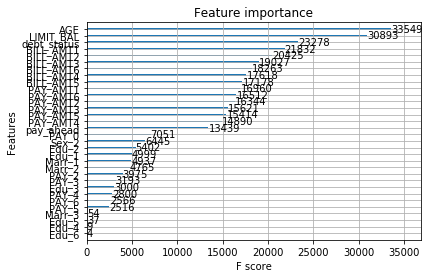

In [245]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## 6. Model Evaluation

In [254]:
#get holdout data and create same features as on. training data

df_holdout = pd.read_csv('hold_out_features.csv', index_col=0)

In [255]:
df_holdout

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,6320,240000,1,1,1,44,-1,-1,-1,-1,...,2701,2427,1104,2362,2188,2701,2427,1104,2362,519
1,29659,50000,1,3,1,41,0,0,0,0,...,48468,39203,28913,26636,1816,1753,1433,990,967,1071
2,28347,20000,2,3,1,41,0,0,0,0,...,11583,13079,14546,16149,2000,1600,2000,2000,2000,2000
3,8523,320000,2,1,2,34,-2,-2,-2,-2,...,-528,-1336,-1336,-1336,0,4,0,0,0,0
4,22135,120000,2,2,1,23,0,0,0,0,...,66825,68820,69776,71297,3000,2500,3100,2700,2800,2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,15903,200000,2,1,2,30,-1,-1,2,2,...,75635,94454,60875,41221,15349,10,32000,0,3000,0
5997,23088,100000,2,2,1,36,2,2,2,2,...,77977,79071,76918,81713,3500,3300,3000,0,6500,3000
5998,20147,50000,2,2,1,42,3,3,2,2,...,24574,24348,16130,16467,500,1200,516,566,585,608
5999,19284,70000,2,1,1,32,0,0,0,0,...,71314,71595,70040,68927,2900,2766,3648,2700,2487,2600


In [256]:
#feature engineer a new column that tells us how many payments a person pays ahead 



df_holdout['pay_ahead'] = df_holdout.PAY_0+df_holdout.PAY_2+df_holdout.PAY_3+df_holdout.PAY_4+df_holdout.PAY_5+df_holdout.PAY_6

In [257]:

df_holdout['debt_status'] = df_holdout['BILL_AMT1'] - df_holdout['BILL_AMT6']

In [262]:
#change categorical categories to cateogry type
df_holdout['SEX'] = df_holdout['SEX'].astype('category')
df_holdout['MARRIAGE'] = df_holdout['MARRIAGE'].astype('category')
df_holdout['EDUCATION'] = df_holdout['EDUCATION'].astype('category')

In [263]:
#create dummy variables
category_dummies_hold_out = pd.get_dummies(df_holdout[['SEX', 'EDUCATION', 'MARRIAGE']], prefix=['Sex', 'Edu', 'Marr'], 
                                           drop_first=True)

In [265]:
df_holdout.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)

In [271]:
#add dummies to df_holdout

#add to original df

df3 = pd.concat([df_holdout, category_dummies_hold_out], axis=1)

In [383]:
X2 = df3.drop(['ID'], axis=1)

## 7. Final Model

In [355]:
#take a look at the best params according to the gridsearch
gscv_rfc.best_params_




{'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 450,
 'oob_score': 'True'}

In [367]:
#plug in best params to a new model for 
rfcl_best = RandomForestClassifier(criterion='entropy', class_weight='balanced',
                                   n_estimators=450, max_features='log2', max_depth=8, oob_score=True)

In [385]:
rfcl_best.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=450, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [396]:
#run final model on holdout data

final_predictions = rfcl_best.predict(X2)

In [397]:
#convert prediction array to series

final_predictions = pd.Series(final_predictions)

In [394]:
final_predictions.to_csv('default_preds_WJ.csv', header=False, index=False)

In [395]:
len(final_predictions)

6001

In [400]:
final_predictions.value_counts()

0    4382
1    1619
dtype: int64